#### Linear regression

Linear regression is a type of supervised machine learning algorithms which predicts number from a given set of inputs.

Linear regression fits a linear model through a set of data points to estimate the relationship betweeen the target outcome label and one or more feature varibales in order to predict a numeric value.

Linear regression places a straight line through the data. 


Suppose we have a sets of data, where x -axis reprents the study time and y - axis represents the score in the exam.
<br/>

<!-- ![preceptron-diagram](../markdown-images/graph_study_time_score.png)  -->

<p align="center">
  <img src="../markdown-images/graph_study_time_score.png" width="500">
</p

Using linear regression we can fit a straight line from the training exampels which might look like the following.
<br/>
<p align="center">
  <img src="../markdown-images/fitted_line_edited.png" width="700">
</p>

Here, the equation/ function for linear regrssion can be represented as:

$f(x) = wx + b $ 

#### Cost function

In order to implement linear regression we first need to define a cost function. The cost function tells us how well our linear regression model is performing.
<br/>

$\hat y ^ {(i)} = f_{w, b} (x ^ {(i)})$ 

$f_{w, b} (x^{(i)}) = wx^{(i)} + b$ 
<br/>

Squared error cost function

$J(w, b) = \frac{1}{2m} \sum_{i=1} ^ {m} (\hat y ^ {(i)} - y ^ {(i)}) ^ 2 $
<br/>
where, <br/>
$\hat y ^ {(i)}$ = predicted value for the ith training example



#### Minimizing the cost function using Gradient descent

Gradeint descent is used to minimize the cost function by updating the weights and biases to the opposite direction of steepest ascent.

Outline:
1. Start with some w, b (set w=0 and b=0)
1. Keep changing w, b to reduce $J(w,b)$
1. Repeat step 2 until we settle at at near a minumum value of loss function


The weights and bias can be updated as:

$w = w - \alpha \frac{\delta}{\delta w} J(w,b)  $ <br/>

$b = b - \alpha \frac{\delta}{\delta b} J(w,b)  $ <br/>

After taking the partial dervivate of J(w,b) the above equation becomes:

$w = w - \alpha \frac{\delta}{\delta w} J(w,b)  =  w - \alpha(\frac{1}{m} \sum_{i=1}^{m} (f_{w, b}(x^{(i)})- y^{(i)})x^{i})) $ <br/>

$b = b - \alpha \frac{\delta}{\delta b} J(w,b) = b - \alpha(\frac{1}{m} \sum_{i=1}^{m} (f_{w, b}(x^{(i)})- y^{(i)}))) $ <br/>

The parameters `w` and `b` are updated simultaneously.

where, <br/>

$\alpha$ is the learning rate.




#### Implementation using Python

Importing necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Loading the data

In [2]:
data = pd.read_csv('../data/study_hrs_score.csv')
data.tail()

,Hours,Scores
23,6.9,76
24,7.8,86
25,1.3,19
26,2.6,30
27,6.1,63


Visualizing the data

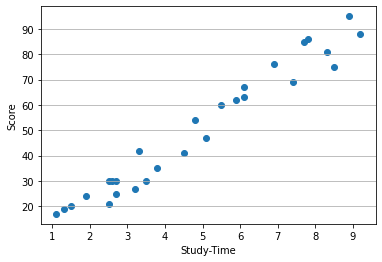

In [3]:
plt.scatter(data.Hours, data.Scores)
plt.xlabel('Study-Time')
plt.ylabel('Score')
plt.grid(axis='y')
plt.show()

Defining the predict method

In [4]:
def predict(m, b, x):
    return m*x + b

Defining the loss function

In [5]:
def loss_function(m, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i].Hours
        y = points.iloc[i].Score
        total_error += ((y - (m *x + b)) **2 ) / 2
    
    total_error / float(len(points))


Defining the gradient descent function

In [6]:
def gradient_descent(m_now, b_now, points, learning_rate):
    m_gradient = 0
    b_gradeint = 0

    n = len(points)

    for i in range(n):
        x = points.iloc[i].Hours
        y = points.iloc[i].Scores

        m_gradient += -(1/n) * x * (y - (m_now *x  + b_now))
        b_gradeint += -(1/n) * (y - (m_now *x  + b_now))
    
    m = m_now - m_gradient * learning_rate
    b = b_now - b_gradeint * learning_rate

    return m, b

9.88770131396897 1.9256129814126135


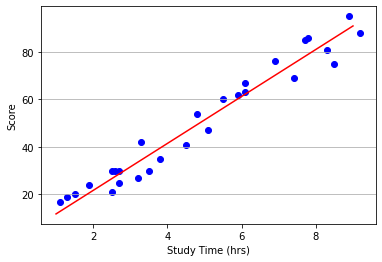

In [7]:
m = 0
b = 0
learning_rate = 0.001
epoches = 1000

for i in range(epoches):
    m, b = gradient_descent(m, b, data, learning_rate)

print(m, b)

plt.scatter(data.Hours, data.Scores, color='blue')
plt.plot(list(range(1,10)), [m * x + b for x in range(1, 10)], color='red')
plt.grid(axis='y')
plt.xlabel('Study Time (hrs)')
plt.ylabel('Score')
plt.show()

In [8]:
class LinearRegression:
    m: float = 0.0
    b: float = 0.0

    def __init__(self, epoches: int = 1000, learning_rate: float = 0.001):
        self.epoches = epoches
        self.learning_rate = learning_rate
    
    def predict(self, x):
        return ((self.m * x) + self.b)
    
    def gradient_descent(self, points):
        for i in range(self.epoches):
            m_now = self.m
            b_now = self.b
            m_gradient = 0
            b_gradeint = 0

            n = len(points)
            
            for i in range(n):
                x = points.iloc[i].Hours
                y = points.iloc[i].Scores

                m_gradient += -(1/n) * x * (y - self.predict(x))
                b_gradeint += -(1/n) * (y - self.predict(x))
            
            self.m = m_now - m_gradient * self.learning_rate
            self.b = b_now - b_gradeint * self.learning_rate

        return self.m, self.b
    
    


In [9]:
linear_reg = LinearRegression(epoches=1000, learning_rate=0.001)
m, b = linear_reg.gradient_descent(data)

In [10]:
print(m,b)

9.88770131396897 1.9256129814126135


In [15]:
linear_reg.predict(1)

11.813314295381584